## estimation of the minimum mean-free-path for H/C/F to be collisionless

So that we can optimize the injection energies of H/C/F.

Note that their injection energies are not necessarily to be the same (e.g., 1 keV)

### To deal with this estimation, the first thing to do is to decide which collision rate equation we should use (considering that there are so many of those equations)

From NRL (2019, P31):

$\chi^{\alpha/\beta} = m_{\beta} v_{\alpha}^2 / 2kT_{\beta}$

in which $\alpha$ is the test particles, streaming with velocity $\mathbf{v}_{\alpha}$ through a background of field particles ($\beta$) with a temperature $T$.

note that $v_{\alpha} = |\mathbf{v}_{\alpha}|$ is the average velocity over an ensemble of test particles.

### we are dealing with fast test particles, i.e.,

$\chi^{\alpha / \beta} \gg 1$

### we care more about one of the relaxation processes (i.e., slowing down, transverse diffusion, parallel diffusion, or energy loss)???

### first take slowing down as an example:

$\nu^{i|i^{\prime}}_{S} = 9.0 \times 10^{-8} \left( \frac{1}{\mu} + \frac{1}{\mu^{\prime}} \right) \frac{\mu^{1/2}}{\epsilon^{3/2}} n_{i^{\prime}} Z^2 Z^{\prime 2} \lambda_{ii^{\prime}}$

### we still need to decide the species of $i$ and $i^{\prime}$ for our mix-ion case (H/C/F).

In GORGON-PIC, we first consider an effective ion specie CF2, composed of C & F:

$A_{CF2} = 0.76*19+0.24*12$

$\rho_{CF2} = \rho_C + \rho_F$

$Z_{CF2} = 0.24*\bar{Z_{C}} + 0.76*\bar{Z_{F}}$

Then, we compute the impurity factor (from *Callen, "Fundamentals of plasma physics" (2006) P20-23*) [**Can't find it**]

$IF_p = \frac{1}{A_{CF2}} \frac{\rho_{CF2}}{\rho_{p}} (\frac{Z_{CF2}}{Z_p})^2 (\frac{2}{A_{CF2}})^{1/2} + 1.0$

Text(0, 0.5, 'Impurity factor')

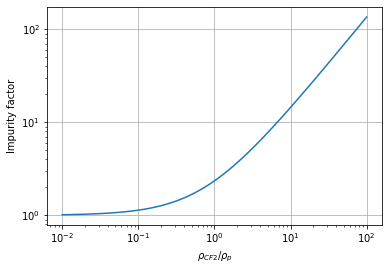

In [203]:
import numpy as np
import matplotlib.pyplot as plt

A_CF2 = 0.76 * 19 + 0.24 * 12
# r_CF2 = r_C + r_F           # a reasonable estimate ???
Z_CF2 = 0.24*6 + 0.76*9     # assume fully ionized
Z_p   = 1.0                 # no value between 0-1

r_ratio = np.logspace(-2,2,100)
# r_ratio = np.linspace(0,10,100)
IF_p = 1.0/A_CF2 * r_ratio * (Z_CF2/Z_p)**2 * (2.0/A_CF2)**(0.5) + 1.0

plt.loglog(r_ratio, IF_p)
plt.grid()
plt.xlabel(r'$\rho_{CF2} / \rho_p$')
plt.ylabel('Impurity factor')
# plt.plot(r_ratio, IF_p)


#### After this, a coefficient in the mfp equation considering the above impurity factor:

$Coeff = \frac{\sqrt{2q_e/m_p}}{IF_p \times 2.9\times 10^{13} \lambda} $

$\lambda$ is the Coulomb logarithm.

Text(0, 0.5, 'Coefficient')

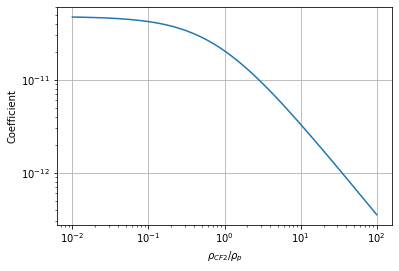

In [204]:
qe = 1.6e-19        # C
mp = 1836*9.1e-31   # kg
coeff = np.sqrt(2.0*qe/mp) / (IF_p * 2.9e13 * 10.0)  # here the Coulomb algarithm is assumed to be 10. Optimize it later. 
plt.loglog(r_ratio, coeff)
plt.grid()
plt.xlabel(r'$\rho_{CF2} / \rho_p$')
plt.ylabel('Coefficient')

#### Finally, the mfp of fast proton crossing a CF2 fluid is:

$\lambda_{mfp,p} = Coeff. \frac{T_i^2}{\rho_p Z_p^4} $

With $Z_p = 1$, the mfp will be strongly dependent on the fluid ion temperature over proton mass density $T_i^2/\rho_p$.

Consider in our case, ion temperature [10,1000] eV, and proton mass density [1e-4,1] kg/m3.

In [113]:
Ti = np.logspace(2,3,100)
rho = np.logspace(-3,-2,100)
# Ti2r = Ti**2/rho

Ti2r = np.logspace(np.log10(Ti.min()**2/rho.max()), np.log10(Ti.max()**2/rho.min()), 100)

For simplicity, we consider a very low impurity factor (almost pure H2) of 1;

the corresponding coefficient becomes 5.0e-11.

Then the mfp of proton becomes:

Text(0, 0.5, 'mfp [um]')

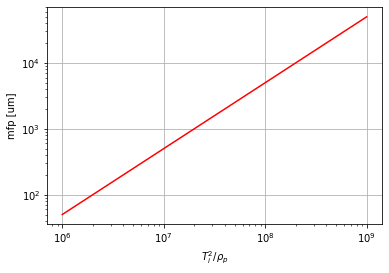

In [114]:
plt.loglog(Ti2r, 5.0e-11*Ti2r*1e6,'-r')
plt.xlabel(r'$T_i^2/\rho_p$')
# plt.xlim([1e3,1e10])
# plt.ylim([1e0,1e6])
plt.grid()
plt.ylabel('mfp [um]')

## It lies in an reasonable range of [50,+] um, and our simulation grid size is 40 um.

## To get the minimum energy of proton that is collisionless, we need the corresponding mfp to be the minimum, i.e., 40 um.

## Still need the ion (proton) collision rate, to calculate the collision time range.

## With the simplest case, from NRL (2019) P28:

$\nu_i = 4.80 \times 10^{-8} Z^4 \mu^{-1/2} n_i \ln\Lambda T_i^{-3/2}$ (s$^{-1}$)

In [138]:
Z_p = 1.0
mu  = 1.0  # in unit of mp
ln  = 10.0 # Coulomb logarithm, for simplicity
Ti = np.logspace(2,3,100)    # eV
ni = np.logspace(-3,-2,100)*1e-3/(mp*1e3)  # cm^-3

# nu_i = 4.8e-8 * Z_p**4 * mu**(-0.5) * ni * ln * Ti**(-1.5)
r2Ti = np.logspace(np.log10(ni.min()/Ti.max()**1.5), np.log10(ni.max()/Ti.min()**1.5), 100)
nu_i = 4.8e-8 * Z_p**4 * mu**(-0.5) * ln * r2Ti

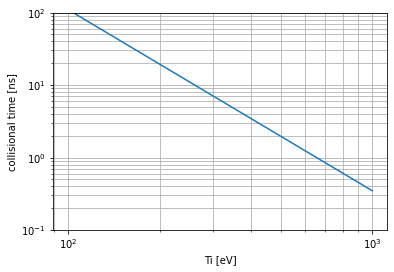

In [143]:
t_col = 1.0/nu_i*1e9 # collision time in ns
plt.loglog(Ti, t_col)
plt.xlabel('Ti [eV]')
plt.ylabel('collisional time [ns]')
plt.ylim([0.1,100])
plt.grid(which='both')

### The collision time range: [0.3, 100] ns, which is reasonable.

### So the minimum energy/velocity of proton to be collisionless corresponds to the minimum mfp & the maximum collision time.

In [145]:
mfp_min = 40e-6 # m, minimum of mfp
clt_max = 0.3e-9 # s, maximun of collision time
vel_min = mfp_min / clt_max
print('vel_min = ', vel_min)
ene_min = 0.5 * mp * vel_min**2 / qe # eV, minimum proton energy
print('ene_min = ', ene_min)

vel_min =  133333.33333333334
ene_min =  92.82000000000001


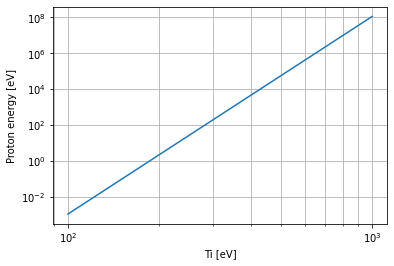

In [149]:
mfp_all_um = 5.0e-11*Ti2r*1e6
clt_all_ns = 1.0/nu_i*1e9
vel_all_kms = np.logspace(np.log10(mfp_all_um.min()/clt_all_ns.max()),np.log10(mfp_all_um.max()/clt_all_ns.min()), 100)
ene_all_eV = 0.5 * mp * (vel_all_kms*1e3)**2 / qe


plt.loglog(Ti, ene_all_eV)
plt.xlabel('Ti [eV]')
plt.ylabel('Proton energy [eV]')
# plt.ylim([0.1,100])
plt.grid(which='both')

#### Note that for C6+, an initialization of 1 keV, corresponding to a velocity of 130 km/s, which in fact seems to be low for a piston propagation after 6 ns.

#### usually the piston velocity (with a parallel B-field) is around: $v_{exp} = 4.6 \times 10^{5} I_{14}^{1/3} \lambda_{\mu m}^{2/3}$ (m/s) [Ciardi2013](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.110.025002)

With the laser intensity $I = 10^{13}$, the expansion velocity is:

In [19]:
I = 1.0e13 / 1.0e14
lmd = 1.0
v_exp = 4.6e5 * I**(1./3.) * lmd**(2./3.)  # m/s
print(v_exp/1e3, "km/s")

213.51308634618783 km/s


In [22]:
qe   = 1.6e-19       # C
me   = 9.1e-31       # kg
mp   = 1836 * me     # kg
m_C6 = mp * 12.0     # kg
v_C6 = v_exp   # m/s
E_C6 = 0.5 * m_C6 * v_C6**2 / qe # eV
print('initial energy of C6+:', E_C6/1e3, 'keV')

initial energy: 2.8562376107064713 keV


#### Corresponding to an initial energy of 2.9 keV for C6+.

#### Similarly, for F9+: the initial energy is around 4.5 keV

In [25]:
m_F9 = mp * 19   # kg
v_F9 = v_exp     # m/s
E_F9 = 0.5 * m_F9 * v_F9**2 / qe # eV
print('initial energy of F9+', E_F9/1e3, 'keV')

initial energy of F9+ 4.522376216951912 keV


In [20]:
qe   = 1.6e-19       # C
me   = 9.1e-31       # kg
mp   = 1836 * me     # kg
m_C6 = mp * 12.0     # kg
# E_C6 = 1.0e3         # eV
v_C6 = 200.0 * 1e3   # m/s
E_C6 = 0.5 * m_C6 * v_C6**2 / qe # eV
# v_C6 = (E_C6 * qe * 2.0 / m_C6)**(0.5)

In [21]:
E_C6 / 1e3

2.5061400000000003

In [15]:
v_C6 / 1e3

126.33606086357831

## A better way to do this, is a meshgrid with (ni, Ti);

## Calculate the mfp using the equation from Callen with impurity factor simplified to be 1;

## Calculate the clt using the equation from NRL

## velocity (and energy) is just mfp / clt

In [209]:
## Define the range should be optimized later
# Ti  = np.logspace(1,3,100)     # eV
# rho = np.logspace(-3,-1,100)   # kg/m^3

Ti  = np.logspace(0,4,100)     # eV
rho = np.logspace(-4,0,100)   # kg/m^3

rr, tti = np.meshgrid(rho,Ti)

<ipython-input-215-697378dbd1a7>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(np.log10(rr),np.log10(tti),lnn,cmap='jet')


([<matplotlib.axis.YTick at 0x16bd6a4f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

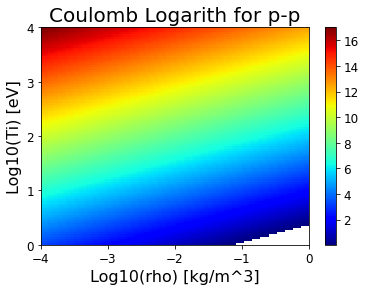

In [215]:
# Coulomb Logarith for proton-proton collisions

lnn = 23 - np.log(tti**(-1) * (2.0*rr*1e-3/(mp*1e3)/tti)**0.5)
lnn[lnn<0] = np.NaN  # the negative values are assumed to be 0

plt.pcolor(np.log10(rr),np.log10(tti),lnn,cmap='jet')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.xlabel('Log10(rho) [kg/m^3]',fontsize=16)
plt.ylabel('Log10(Ti) [eV]',fontsize=16)
plt.title('Coulomb Logarith for p-p',fontsize=20)
# plt.xticks([-3, -2.5, -2, -1.5, -1], fontsize=12)
# plt.yticks([1, 1.5, 2, 2.5, 3], fontsize=12)
plt.xticks([-4, -3, -2, -1, 0], fontsize=12)
plt.yticks([0, 1, 2, 3, 4], fontsize=12)


<ipython-input-216-3d60b4931052>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(np.log10(rr),np.log10(tti),np.log10(mfp_mm),cmap='jet')


([<matplotlib.axis.YTick at 0x16c2b2730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

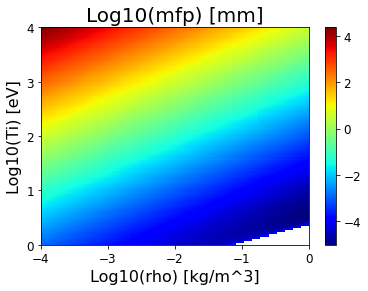

In [216]:


IF_p = 1.0


coeff = np.sqrt(2.0*qe/mp) / (IF_p * 2.9e13 * lnn)
mfp_mm = tti**2/rr * coeff * 1e3
# mfp_mm = tti**2/rr * 5e-11 * 1e3

plt.pcolor(np.log10(rr),np.log10(tti),np.log10(mfp_mm),cmap='jet')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.xlabel('Log10(rho) [kg/m^3]',fontsize=16)
plt.ylabel('Log10(Ti) [eV]',fontsize=16)
plt.title('Log10(mfp) [mm]',fontsize=20)
# plt.xticks([-3, -2.5, -2, -1.5, -1], fontsize=12)
# plt.yticks([1, 1.5, 2, 2.5, 3], fontsize=12)
plt.xticks([-4, -3, -2, -1, 0], fontsize=12)
plt.yticks([0, 1, 2, 3, 4], fontsize=12)

<ipython-input-218-104335601432>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(np.log10(rr),np.log10(tti),np.log10(clt_ns),cmap='jet')


([<matplotlib.axis.YTick at 0x16cd2bfa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

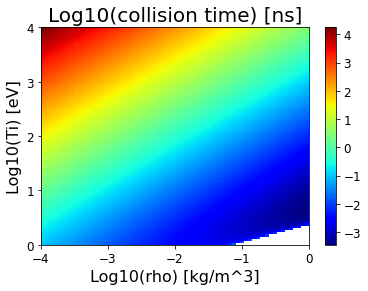

In [218]:
# ni  = rho*1e-3/(mp*1e3)        # cm^-3

clr = 4.8e-8 * Z_p**4 * mu**(-0.5) * lnn * rr*1e-3/(mp*1e3)/tti**1.5  # s^-1, with optimized Coulomb Logarithm
clt_ns = 1.0/clr*1e9     # ns
plt.pcolor(np.log10(rr),np.log10(tti),np.log10(clt_ns),cmap='jet')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.xlabel('Log10(rho) [kg/m^3]',fontsize=16)
plt.ylabel('Log10(Ti) [eV]',fontsize=16)
plt.title('Log10(collision time) [ns]',fontsize=20)
# plt.xticks([-3, -2.5, -2, -1.5, -1], fontsize=12)
# plt.yticks([1, 1.5, 2, 2.5, 3], fontsize=12)
plt.xticks([-4, -3, -2, -1, 0], fontsize=12)
plt.yticks([0, 1, 2, 3, 4], fontsize=12)

<ipython-input-219-c1afc970f391>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(np.log10(rr),np.log10(tti),np.log10(vel_kms),cmap='jet')


([<matplotlib.axis.YTick at 0x16d271dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

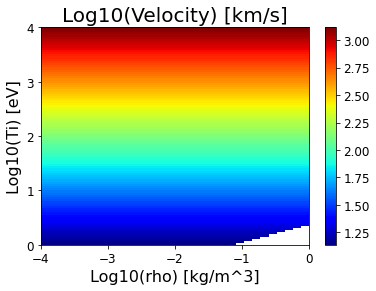

In [219]:
vel_kms = mfp_mm / clt_ns * 1e3
plt.pcolor(np.log10(rr),np.log10(tti),np.log10(vel_kms),cmap='jet')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.xlabel('Log10(rho) [kg/m^3]',fontsize=16)
plt.ylabel('Log10(Ti) [eV]',fontsize=16)
plt.title('Log10(Velocity) [km/s]',fontsize=20)
# plt.xticks([-3, -2.5, -2, -1.5, -1], fontsize=12)
# plt.yticks([1, 1.5, 2, 2.5, 3], fontsize=12)
plt.xticks([-4, -3, -2, -1, 0], fontsize=12)
plt.yticks([0, 1, 2, 3, 4], fontsize=12)

<ipython-input-220-c451fe30e0a7>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(np.log10(rr),np.log10(tti),np.log10(ene_ev),cmap='jet')


([<matplotlib.axis.YTick at 0x16d7bf100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

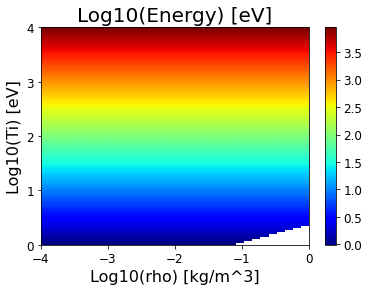

In [220]:
ene_ev = 0.5 * mp * (vel_kms*1e3)**2 / qe
plt.pcolor(np.log10(rr),np.log10(tti),np.log10(ene_ev),cmap='jet')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.xlabel('Log10(rho) [kg/m^3]',fontsize=16)
plt.ylabel('Log10(Ti) [eV]',fontsize=16)
plt.title('Log10(Energy) [eV]',fontsize=20)
# plt.xticks([-3, -2.5, -2, -1.5, -1], fontsize=12)
# plt.yticks([1, 1.5, 2, 2.5, 3], fontsize=12)
plt.xticks([-4, -3, -2, -1, 0], fontsize=12)
plt.yticks([0, 1, 2, 3, 4], fontsize=12)

In [ ]:
1.224E+00 # g/cm2
2.7       # g/cm3

1.224E+00

In [222]:
1.224E+00 / 2.7  # cm

0.4533333333333333

In [ ]:
4.5 # mm
1.5 # mm of Al

In [223]:
0.15 * 2.7


0.405